In [28]:
#NLP INTRO

In [29]:
a = "Umaima"
print(a)

Umaima


In [30]:
a = "DATAFRAME"
print(a[5])

R


In [31]:
a = "Data FraME"
print(a[2:6])
print("-" * 20)
print(a[-5:-2])
print("-" * 50)
print(a[1:6:2])

ta F
--------------------
Fra
--------------------------------------------------
aaF


In [32]:

print(a.split())

['Data', 'FraME']


In [33]:
print(a.lower())
print(a.upper())
print(a.replace("Data" , "low"))

data frame
DATA FRAME
low FraME


In [34]:
a = "data frame"
b = "train"
print(a + " " + b)

data frame train


In [35]:
file = open('dataset1.txt' , "w+")

In [36]:
file1 = open('dataset2.txt' , "w+")

In [37]:
for i in range(6):
  file1.write("Line number is %d\r\n" % (i + 1))

In [38]:
file1.close()

In [39]:
file1 = open('dataset2.txt' , "a+")

In [40]:
file1.close()

In [41]:
file1 = open('dataset2.txt' , "r")

In [42]:
if file1.mode == 'r':
  contents = file1.read()
  print(contents)

Line number is 1
Line number is 2
Line number is 3
Line number is 4
Line number is 5
Line number is 6



## Text Preprocessing
The pre-processing steps for the problem primarily depend on the domain and the problem itself; we don't need to apply all the steps for every problem. In this case, we'll use the NLTK (Natural Language Toolkit) library. Assuming we have textual data available, we need to apply numerous pre-processing steps to the data in order to convert those words into numerical features that work with machine learning algorithms.

In [43]:
import nltk
import string
import re

## Text Lowercasing
This is done to reduce the size of the vocabulary of our text data.

In [44]:
def lowercase_text(text):
    return text.lower()

In [45]:
input_str = "Weather is too Cloudy. Possibility of Rain is High, Today!!"
print(lowercase_text(input_str))

weather is too cloudy. possibility of rain is high, today!!


## Remove numbers
We either remove the numbers or convert the numbers into textual representation. We can use regular expressions (re) to remove the numbers

In [46]:
def remove_num(text):
    result = re.sub(r'\d+', '', text)
    return result

In [47]:
input_s = "You bought 6 candies from shop, and 4 candies are in home."
print(remove_num(input_s))

You bought  candies from shop, and  candies are in home.


## Converting numbers to words using the inflect library

In [48]:
!pip install inflect

In [49]:
import inflect
q = inflect.engine()

In [50]:
# convert number into text
def convert_num(text):
    # split strings into list of texts
    temp_string = text.split()
    # initialise empty list
    new_str = []
    for word in temp_string:
        # if text is a digit, convert the digit to numbers and append into the new_str list
        if word.isdigit():
            temp = q.number_to_words(word)
            new_str.append(temp)
        # append the texts as it is
        else:
            new_str.append(word)
    #join the texts of new_str to form a string
    temp_str=' '.join(new_str)
    return temp_str

input_num = "You bought 6 candies from shop, and 4 candies are in home."
print(convert_num(input_num))

You bought six candies from shop, and four candies are in home.


## Remove Punctuation
We remove punctuations so that we don't have different forms of the same word. If we don't remove punctuations, been.,been,been! will all be treated differently.

In [51]:
def rem_punct(text):
    translator=str.maketrans('','',string.punctuation)
    return text.translate(translator)

input_str="Hey, Are you excited??, After a week, we will be in Shimla"
rem_punct(input_str)

'Hey Are you excited After a week we will be in Shimla'

In [52]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

## Remove default stopwords
Words that don't add to the sentence's meaning are known as stopwords. As a result, they can be safely eliminated without altering the sentence's meaning. To eliminate stopwords from our text and obtain a list of word tokens, utilize the stopwords in the NLTK (Natural Language Toolkit) library.

In [55]:
# importing nltk library
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [56]:
# remove stopwords function
def rem_stopwords(text):
    stop_words = set(stopwords.words("english"))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in string.punctuation]
    filtered_text = [word for word in filtered_text if word not in stop_words]
    return filtered_text

ex_text = "Data is the new oil. A.I is the last invention"
rem_stopwords(ex_text)


['Data', 'new', 'oil', 'A.I', 'last', 'invention']

## Stemming
Finding a word's root form is known as stemming. The portion to which inflectional affixes (such as -ed, -ize, etc.) are appended is called the root or stem. By eliminating a word's prefix or suffix, we would produce the stem words. Therefore, stemming a word might not produce words.

For instance:



Mangoes ---> Mango Boys ---> Boy going ---> go



We must turn our sentences into tokens if they aren't already. Following the conversion of text strings into tokens, the word tokens can then be transformed back into their root form. These three stemmers are the Lancaster, Porter, and snowball stemmers. Among these, we typically utilize the Porter stemmer.



In [57]:
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize

In [58]:
stem1 = PorterStemmer()

In [59]:
def s_words(text):
    word_tokens = word_tokenize(text)
    stems = [stem1.stem(word) for word in word_tokens]
    return stems

In [60]:
text = 'Data is the new revolution in the World, in a day one individual would generate terabytes of data.'
print(s_words(text))

['data', 'is', 'the', 'new', 'revolut', 'in', 'the', 'world', ',', 'in', 'a', 'day', 'one', 'individu', 'would', 'gener', 'terabyt', 'of', 'data', '.']


## Lemmatization
As stemming, lemmatization does the same, but the only difference is that lemmatization ensures that the root word belongs to the language. Because of the use of lemmatization, we will get valid words. In NLTK, we use WordLemmatizer to get the lemmas of words. We also need to provide a context for the lemmatization. So, we added POS (parts-of-speech) as a parameter.

In [61]:
from nltk.stem import wordnet
from nltk.tokenize import word_tokenize

In [62]:
lemma = wordnet.WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [63]:
def lemmatize_word(text):
    word_tokens = word_tokenize(text)
    lemmas = [lemma.lemmatize(word, pos='v') for word in word_tokens]
    return lemmas

In [64]:
text = 'Data is the new revolution in the World, in a day one individual would generate terabytes of data.'
print(lemmatize_word(text))

['Data', 'be', 'the', 'new', 'revolution', 'in', 'the', 'World', ',', 'in', 'a', 'day', 'one', 'individual', 'would', 'generate', 'terabytes', 'of', 'data', '.']


## Part of Speech (POS) Tagging
Parts of speech, or pos, describe how a word is employed in a sentence. A word in the phrase may have multiple semantic interpretations and situations. Basic natural language processing (NLP) models, such as the bag-of-words (BOW) model, are unable to recognize word associations. We accomplish this by using POS tagging, which assigns a word to its POS tag according to its context in the data. Relationships between words are also extracted using POS.

In [95]:
# importing tokenize library
from nltk.tokenize import word_tokenize
from nltk import pos_tag
# Download the necessary resource:
import nltk
nltk.download('averaged_perceptron_tagger')

# convert text into word_tokens with their tags
def pos_tagg(text):
    word_tokens = word_tokenize(text)
    return pos_tag(word_tokens)

pos_tagg('Are you afraid of something?')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('Are', 'NNP'),
 ('you', 'PRP'),
 ('afraid', 'IN'),
 ('of', 'IN'),
 ('something', 'NN'),
 ('?', '.')]

In the above example, NNP stands for Proper Noun, PRP for Proper Noun, IN as Preposition. We can get all the details pos tags using the Penn Treebank tagset

In [ ]:

# downloading the dataset
nltk.download('tagsets')

#extract information about the tag
nltk.help.upenn_tagset('PRP')

## Chunking
Chunking is the process of extracting phrases from unstructured text and giving them more structure. We also call it shallow parsing. We can do chunking on top of POS tagging. It groups words into chunks, mainly for noun phrases. Chunking is done by using regular expressions.

In [ ]:
# importing libraries
from nltk.tokenize import word_tokenize
from nltk import pos_tag

# here we define chunking function with text and regular
# expressions representing grammar as parameter
def chunking(text, grammar):
    word_tokens = word_tokenize(text)

    # label words with POS
    word_pos = pos_tag(word_tokens)

    # create chunk parser using grammar
    chunkParser = nltk.RegexpParser(grammar)

    # test it on the list of word tokens with tagged POS
    tree = chunkParser.parse(word_pos)

    for subtree in tree.subtrees():
        print(subtree)
    # tree.draw()
sentence='the little red parrot is flying in the sky'
grammar="NP: {<DT>?<JJ>*<NN>}"
chunking(sentence,grammar)

In the above example, we defined the grammar by using the regular expression rule. This rule tells you that NP (noun phrase) chunk should be formed whenever the chunker finds the optional determiner (DT) followed by any number of adjectives (JJ) and then a noun (NN).

Libraries like Spacy and TextBlob are best for chunking

## Named Entity Recognition
Information is extracted from unstructured text using this method. It is employed to categorize the entities found in the text into groups, such as individuals, organizations, events, locations, etc. This will provide you an in-depth understanding of the text and the connections between the various elements.

In [94]:
# Importing tokenization and chunk
from nltk.tokenize import word_tokenize
from nltk import pos_tag, ne_chunk
nltk.download('maxent_ne_chunker')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('words')
nltk.download('maxent_ne_chunker_tab')

def ner(text):
    # tokenize the text
    word_tokens = word_tokenize(text)

    # pos tagging of words
    word_pos = pos_tag(word_tokens)

    # tree of word entities
    print(ne_chunk(word_pos))

text = 'Brain Lara scored the highest 400 runs in a test match which played in between WI and England.'
ner(text)


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.


(S
  (PERSON Brain/NNP)
  (PERSON Lara/NNP)
  scored/VBD
  the/DT
  highest/JJS
  400/CD
  runs/NNS
  in/IN
  a/DT
  test/NN
  match/NN
  which/WDT
  played/VBD
  in/IN
  between/IN
  (ORGANIZATION WI/NNP)
  and/CC
  (GPE England/NNP)
  ./.)


## Understanding Regex
As a software developer, you have undoubtedly come across regular expressions numerous times and become perplexed by their intimidating character sets arranged as follows:

/^\w+([.-]?\w+)[[.-]?\w+)(.[a-zA-Z]{2,3}) * @\w++$


By improving your algorithmic skills, Regular Expressions (Regx or RegExp) can help you become a more proficient problem solver. At first, the Regx structure may seem daunting, but after you understand all the patterns and apply them correctly to your job, it becomes incredibly rewarding.



## What is Regex and why is it important?
A Regex, also known as a regular expression, is a kind of object that may be used to search through text and find the information you need in order to extract information from any string data. Any character combination in a string can be checked and matched using RegEx, including punctuation, numerals, letters, and even white spaces.

Let's say, for instance, that you need to match the format of security numbers or email addresses. RegEx can be used to replace another substring and to check for patterns inside text strings.



A RegEx, for example, could instruct the software to look for a certain text in the string and then print the results appropriately. Text matching, word repetition, branching, and pattern composition are examples of expressions.

RegEx is supported by Python libraries. RegEx supports a number of things, including White Space, Modifiers, and Identifiers.







| **Identifiers**                   | **Modifiers**                                                    | **White space characters** | **Escape required**       |
|---------------------------------|--------------------------------------------------------------|------------------------|-----------------------|
| `\d` = any number (a digit)     | `\d` represents a digit. Ex: `\d{1,5}` will declare a digit between 1,5 like 424, 444, 545, etc. | `\n` = new line        | `.` `+` `?` `*` `{}` `$` `^` `()` `[]` `|` `\` |
| `\D` = anything but a number (a non-digit) | `+` = matches 1 or more                                      | `\s` = space           |                       |
| `\s` = space (tab, space, newline, etc.) | `?` = matches 0 or 1                                         | `\t` = tab             |                       |
| `\S` = anything but a space     | `*` = 0 or more                                               | `\e` = escape          |                       |
| `\w` = letters (match alphanumeric character, including `_`) | `$` match end of a string                                    | `\r` = carriage return |                       |
| `\W` = anything but letters (matches a non-alphanumeric character excluding `_`) | `^` match start of a string                                  | `\f` = form feed       |                       |
| `.` = anything but letters (periods) | `|` matches either x or y                                     | ---------------------- |                       |
| `\b` = any character except for new line | `[]` = range or "variance"                                   | ---------------------- |                       |
| `\`                             | `{x}` = this amount of preceding element                      |                        |                       |


## RegEx Syntax
  import re
* In addition to being widely used for web scraping, Python's re module is utilized for string searching and manipulation.*W+ and ^ Expression Example**

* ^: This expression corresponds to the beginning of a string.

* w+: This expression corresponds to the string's alphanumeric characters.



The use of w+ and ^ expressions in code will be demonstrated in this example. Just concentrate on the w+ and ^ expression; re.findall will be covered in the following sections.



Let's look at "iNeuron13, Data is a new fuel" as an example. The code will produce 'iNeuron13' if it is executed.



In [67]:
import re

sent = "dataset, Data is a new fuel"
r2 = re.findall(r"^\w+", sent)
print(r2)


['dataset']


*Note*: If we remove the + sign from \w, the output will change and it'll give only the first character of the first letter, i.e., [i].

## Example of \s expression in re.split function
* \s: To add a space to a string, use this expression. We'll utilize the split function in a straightforward example to help you better understand this expression. The re.split function must be used in this example to split each word, and \s is used to allow each word in the string to be parsed independently.

In [68]:
import re
print(re.split(r'\s', 'We splited this sentence'))

['We', 'splited', 'this', 'sentence']


As we can see above, we got the output ['We', 'splited', 'this', 'sentence'], but what if we remove '\' from '\s', it will give a result like removing 's' from the entire sentence. Let's see in the example below:

import re
print(re.split(r's', 'We splited this sentence'))

Similarly, there are series of regular expressions in Python that you can use in various ways like \d, \D, $, \b, etc.

## Use RegEx methods
There are multiple ways to actually run queries on an input string using the "re" packages. We'll observe many approaches, including:

re.match()
 re.search()
 re.findall()



Note: Python provides two distinct primitive operations based on RegEx. While the search function looks for a match anywhere in the string, the match method only looks for a match at the beginning.



### Using re.match()
The RegEx pattern is matched to a string with an optional flag using the match function. Here, words that begin with "i" will be matched by \w+ and \W, while anything that does not begin with "i" will not be identified. We use the for loop to check if each entry in the list or string matches.

In [69]:
import re
lists = ['icecream images', 'i immitated', 'inner peace']
for i in lists:
    q = re.match("(i\w+)\W(i\w+)", i)
    if q:
        print(q.groups())


('icecream', 'images')


## Finding Pattern in the text (re.search())
It's normal practice to utilize a RegEx to look for patterns in text. Using a string and a RegEx pattern, this function looks for the pattern inside the string.

You must import re before you can use the re.search() function. The "pattern" and "text" are passed to the search() function, which uses them to search the supplied string and returns the match object if the pattern is found or not.



In [70]:
import re

pattern = ["playing", "dataset"]
text = "Raju is playing outside."

for p in pattern:
    print("You're looking for '%s' in '%s'" % (p, text), end = ' ')

    if re.search(p, text):
        print('Found match!')
    else:
        print('no match found!')


You're looking for 'playing' in 'Raju is playing outside.' Found match!
You're looking for 'dataset' in 'Raju is playing outside.' no match found!


In the above example, we look for two literal strings "playing", "dataset" and in the text string we had taken "Raju is playing outside.". For "playing" we got the match and in the output we got "Found Match", while for the word "dataset" we didn't get any match. So, we got no match found for that word.

## Using re.findall() for text
To iterate across the file's lines, we utilize the re.findall() module. All of the matches will be listed at once. In this example, the re.findall() method is used to retrieve email addresses from a list and to retrieve all emails from the list.

In [71]:
import re

kgf = "Abc@gmail.com, XYX@gmail.com, lmn@gmail.com, efg@gmail.com"
emails = re.findall(r'[\w\.-]+@[\w\.-]+', kgf)

for e in emails:
    print(e)


Abc@gmail.com
XYX@gmail.com
lmn@gmail.com
efg@gmail.com


## Text Normalization
Text normalization is one of the most neglected steps in text pre-processing. The process of changing a text into its canonical (or standard) form is known as text normalization. For example, "ok" and "k" can be changed to "okay," which is its standard form. Words like "preprocessing," "pre-processing," and "preprocessing" that are almost identical can also be mapped to just "preprocessing."

Text normalization is particularly helpful for noisy texts with a high frequency of misspellings, acronyms, and out-of-vocabulary (OOV) words, such comments on blog posts, social media posts, and text messages.



| Raw     | Normalized   |
|---------|--------------|
| 2moro   | tomorrow     |
| 2mrrw   | tomorrow     |
| 2morrow | tomorrow     |
| 2mrw    | tomorrow     |
| tomrw   | tomorrow     |
| b4      | before       |
| otw     | on the way   |
| :)      | smile        |


## Effects of normalization
Even the analysis of highly unstructured clinical texts, in which doctors take notes in unconventional ways, has shown promise with text normalization. In cases where spelling variations and near synonyms are prevalent, we have also found it helpful for subject extraction (e.g., 'topic modelling,' 'topic modelling,' 'topic-modeling,' 'topic-modelling').

There is no set method for normalizing texts, in contrast to stemming and lemmatization. Usually, it depends on the assignment. For instance, it may be argued that normalizing text messages differs from normalizing clinical writings.



Dictionary mappings, statistical machine translation (SMT), and spelling-correction-based methods are a few popular methods for text normalization.



## TOKENIZERS
### NLTK

In [72]:
!pip install --user -U nltk

In [73]:
from nltk.tokenize.regexp import WhitespaceTokenizer
m = "There is no need to panic. We need to work together, take small yet important measures to ensure self-protection."

In [74]:
from nltk.tokenize import word_tokenize
text = """Founded in 2002, SpaceX's mission is to enable humans to become a spacefaring civilization and a
multi-planetary species by building a self-sustaining city on Mars. In 2008, SpaceX's Falcon 1 became the
first privately developed liquid-fuel launch vehicle to orbit the Earth."""
word_tokenize(text)

['Founded',
 'in',
 '2002',
 ',',
 'SpaceX',
 "'s",
 'mission',
 'is',
 'to',
 'enable',
 'humans',
 'to',
 'become',
 'a',
 'spacefaring',
 'civilization',
 'and',
 'a',
 'multi-planetary',
 'species',
 'by',
 'building',
 'a',
 'self-sustaining',
 'city',
 'on',
 'Mars',
 '.',
 'In',
 '2008',
 ',',
 'SpaceX',
 "'s",
 'Falcon',
 '1',
 'became',
 'the',
 'first',
 'privately',
 'developed',
 'liquid-fuel',
 'launch',
 'vehicle',
 'to',
 'orbit',
 'the',
 'Earth',
 '.']

Note in the above, we had used a slightly different syntax for importing the module. You'll recognize by now the variable assignment.

In [75]:
tokens=WhitespaceTokenizer().tokenize(m)
print(len(tokens))

19


In [76]:
tokens

['There',
 'is',
 'no',
 'need',
 'to',
 'panic.',
 'We',
 'need',
 'to',
 'work',
 'together,',
 'take',
 'small',
 'yet',
 'important',
 'measures',
 'to',
 'ensure',
 'self-protection.']

In [77]:
my_vocab=set(tokens)
print(len(tokens))

19


In [81]:
my_vocab

{'There',
 'We',
 'ensure',
 'important',
 'is',
 'measures',
 'need',
 'no',
 'panic.',
 'self-protection.',
 'small',
 'take',
 'to',
 'together,',
 'work',
 'yet'}

Now we are going to perform the same operation but with a different tokenizer.


In [82]:
my_st = "There is no need to panic. We need to work together, take small yet important measures to ensure self-protection, the Prime Minister tweeted."

 We'll import a different tokenizer:

In [83]:
from nltk.tokenize.regexp import WordPunctTokenizer

The above tokenizer also splits the words into tokens:

In [84]:
m_t = WordPunctTokenizer().tokenize(my_st)
print(len(m_t))

29


In [85]:
m_t

['There',
 'is',
 'no',
 'need',
 'to',
 'panic',
 '.',
 'We',
 'need',
 'to',
 'work',
 'together',
 ',',
 'take',
 'small',
 'yet',
 'important',
 'measures',
 'to',
 'ensure',
 'self',
 '-',
 'protection',
 ',',
 'the',
 'Prime',
 'Minister',
 'tweeted',
 '.']

What is the difference between the above approaches? In the first one, vocabulary ends up containing "words" and "words." as two distinct words; whereas in the second example "words" is a token type and "." (i.e. the dot) is split into a separate token and this results into a new token type in addition to "words."

In [86]:
from nltk.tokenize import sent_tokenize

text = """Founded in 2002, SpaceX's mission is to enable humans to become a spacefaring civilization
and a multi-planet species by building a self-sustaining city on Mars.
In 2008, SpaceX's Falcon 1 became the first privately developed liquid-fuel launch vehicle to orbit the Earth."""

sent_tokenize(text)


["Founded in 2002, SpaceX's mission is to enable humans to become a spacefaring civilization \nand a multi-planet species by building a self-sustaining city on Mars.",
 "In 2008, SpaceX's Falcon 1 became the first privately developed liquid-fuel launch vehicle to orbit the Earth."]

## Frequency Distribution
What is Frequency distribution? This is basically counting words in your texts. To give a brief example of how it works, we use:

In [87]:
# from nltk.book import *
import nltk
# nltk.download('gutenberg')
print("\n\n\n")
text1 = "There is no need to panic. We need to work together, take small yet important measures to ensure self-protection."
freqDist = nltk.FreqDist(word_tokenize(text1))
print(freqDist)





<FreqDist with 18 samples and 22 outcomes>


The class FreqDist works like a dictionary where keys are the words in the text and the values are the counts associated with that word. For example, if you want to see how many words "person" are in the text, you can type as:

In [88]:
print(freqDist["person"])

0


In [89]:
print(freqDist["is"])

1


One of the most important functions in FreqDist is the .keys() function. Let us see what it will give in the below code.

In [90]:
words = freqDist.keys()
print(type(words))

<class 'dict_keys'>


After running the above code, it'll give as class dict_keys, in other words, you get a list of all the words in your text.

And if you want to see how many words are there in the text, you can use:


In [91]:
print(len(words))

18


What is the difference when the function does the identical tasks in the class nltk.text.Text? The distinction is that FreqDist allows you to write your own text without requiring that it be converted to nltk.text.class for text.

Plot is the other typical function. The most frequently used terms in your content will be shown by Plot. Thus, to view the top 15 terms in your content, follow these steps:



<Axes: xlabel='Samples', ylabel='Counts'>

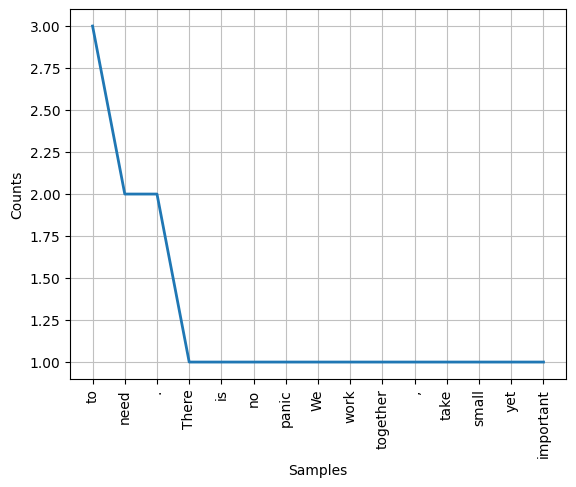

In [92]:
freqDist.plot(15)